# TestCase 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config1.json")

### Configuration has been read from config.json ###
# dimension : 1
# testcase : 1
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 100}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 1
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
from IPython.display import Math, display

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/flecourtier/anaconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400441250/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "codebis"

/home/flecourtier/Bureau/Article1/codebis


In [8]:
if version == 1:
    from testcases.networks.test_1D.test_1.test_1_v1 import Run_laplacian1D,Poisson_1D
elif version == 2:
    from testcases.networks.test_1D.test_1.test_1_v2 import Run_laplacian1D,Poisson_1D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_1D import TestCase1
problem = TestCase1(version=version)

Using device: cpu
torch loaded; device is cpu


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


init
init
>> load network /home/flecourtier/Bureau/Article1/codebis/networks/test_1D/test_fe1_v1.pth
optimizers loaded
network loaded
Error  tensor([0.0537])


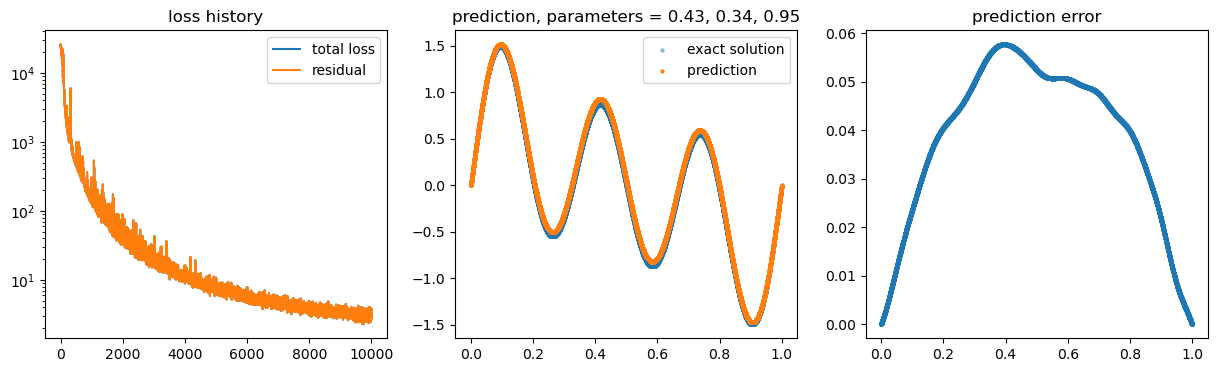

In [9]:
pde = Poisson_1D()
trainer,u_theta = Run_laplacian1D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

In [12]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir, tab_degree=[1], tab_nb_vert=[200])
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/flecourtier/Bureau/Article1/codebis/results/fenics/test_1D/testcase1/version1/cvg/param1/


### Run FEM

In [13]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=True)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  200  vertices and degree  1  : h = 0.005025125628140725
V_theta created with  200  vertices and degree  10
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
norme_H1 (abs) =  0.049524186332372135
seminorme_H1 (abs) =  0.04944415852332242
nb_vert=200, norme_L2=8.002780904971389e-05


In [16]:
0.04944415852332242/0.0017196086029531862

28.753146755842597

In [ ]:
print(0.31832935267246854/0.010885081462391824)
print(0.31832935267246854/0.009085433051714067)

29.244554004699264
35.0373340335618


In [ ]:
# error_estimations.run_fem_alldeg(new_run=False,plot_cvg=False)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  32  vertices and degree  1  : h = 0.032258064516129115
V_theta created with  32  vertices and degree  10
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
norme_H1 =  0.009132946843955318
norme_H1 (rel) =  0.003507142875170925
nb_vert=32, norme_L2=0.0003494518074507185


In [ ]:
# error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=False)

### Run Mult

In [ ]:
tab_M = [3.0,10.0]

In [15]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=True)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  200  vertices and degree  1  : h = 0.005025125628140725
V_theta created with  200  vertices and degree  10
on fait du mult
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
norme_H1 (abs) =  0.001723182746180375
seminorme_H1 (abs) =  0.0017196086029531862
nb_vert=200, norme_L2=3.5741432271889697e-06
## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  200  vertices and degree  1  : h = 0.005025125628140725
V_theta created with  200  vertices and degree  10
on fait du mult
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
norme_H1 (abs) =  0.0015229884837979885
seminorme_H1 (abs) =  0.0015203958252206675
nb_vert=200, norme_L2=2.592658577320914e-06


In [ ]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=False)

### Save results

/home/flecourtier/Bureau/Article1/code/results/fenics/test_1D/testcase1/version1/cvg/param1/Mult_case1_v1_param1_degree1_M3.0.csv
Mult weak P1 M3.0 not found
/home/flecourtier/Bureau/Article1/code/results/fenics/test_1D/testcase1/version1/cvg/param1/Mult_case1_v1_param1_degree1_M100.0.csv
Mult weak P1 M100.0 not found


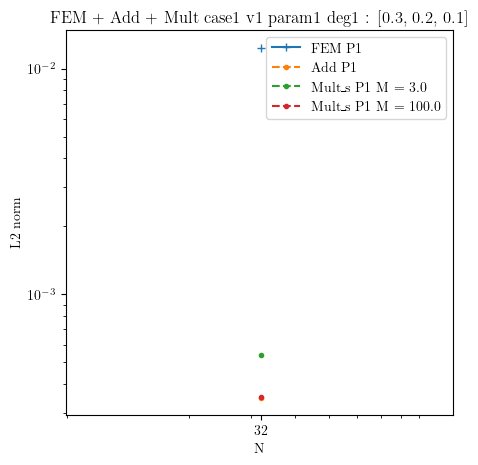

In [ ]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [ ]:
compare_methods.save_tab_alldeg_allM(tab_M)

Mult weak P1 M3.0 not found
Mult weak P1 M100.0 not found


/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:198: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/flecourtier/Bureau/Article1/code/src/modfenics/error_estimations/compare.py:202: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


KeyboardInterrupt: 

## Gains constant from Error estimations

In [17]:
deg_m = 1
assert deg_m in [0,1]

In [18]:
import numpy as np
from scimba.equations.domain import SpaceTensor
from testcases.utils import select_param
import dolfin as df
import math

# Spatial coordinates
# N_ex = 500
N_ex = 2000
mesh_ex = df.UnitIntervalMesh(N_ex)
V_ex = df.FunctionSpace(mesh_ex, "CG", 1)
# V_ex = df.FunctionSpace(mesh_ex, "CG", 4)
dx_ex = df.Measure("dx", domain=mesh_ex)
XXYY = V_ex.tabulate_dof_coordinates().reshape(-1,1)
X_test = torch.tensor(XXYY,requires_grad=True)
X_test = SpaceTensor(X_test,torch.zeros_like(X_test,dtype=int))

# Parameter
param_num = config["error_estimations"]["param_num"]    
params = [select_param(problem,param_num)]
print("param =",params[0])

nb_params = len(trainer.pde.parameter_domain)
shape = (XXYY.shape[0],nb_params)
ones = torch.ones(shape)
mu_test = (torch.Tensor(params[0]).to(device) * ones).to(device)

u_ex = pde.reference_solution(X_test, mu_test).cpu().detach().numpy()[:,0]
du_ex_dx = pde.reference_solution_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]
d2u_ex_dx2 = pde.reference_solution_second_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]

pred = u_theta.setup_w_dict(X_test, mu_test)
u_theta.get_first_derivatives(pred, X_test)
u_theta.get_second_derivatives(pred, X_test)
        
u_theta_ = pred["w"][:,0].cpu().detach().numpy()
u_theta_x = pred["w_x"][:,0].cpu().detach().numpy()
u_theta_xx = pred["w_xx"][:,0].cpu().detach().numpy()

param = [0.3, 0.2, 0.1]


In [19]:
# Solutions
u_fe = df.Function(V_ex)
u_fe.vector()[:] = u_ex

u_theta_fe = df.Function(V_ex)
u_theta_fe.vector()[:] = u_theta_

# First derivatives
dudx_fe = df.Function(V_ex)
dudx_fe.vector()[:] = du_ex_dx

duthetadx_fe = df.Function(V_ex)
duthetadx_fe.vector()[:] = u_theta_x

# Second derivatives
d2udx2_fe = df.Function(V_ex)
d2udx2_fe.vector()[:] = d2u_ex_dx2

d2uthetadx2_fe = df.Function(V_ex)
d2uthetadx2_fe.vector()[:] = u_theta_xx

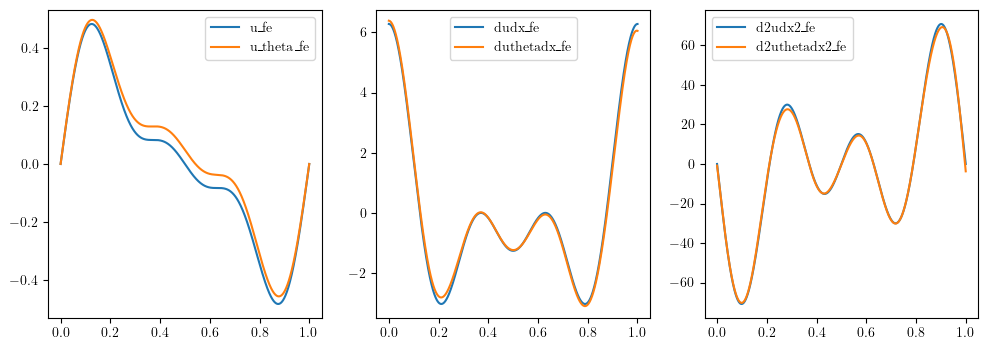

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
df.plot(u_fe,label="u_fe")
df.plot(u_theta_fe,label="u_theta_fe")
plt.legend()

plt.subplot(1,3,2)
df.plot(dudx_fe,label="dudx_fe")
df.plot(duthetadx_fe,label="duthetadx_fe")
plt.legend()

plt.subplot(1,3,3)
df.plot(d2udx2_fe,label="d2udx2_fe")
df.plot(d2uthetadx2_fe,label="d2uthetadx2_fe")
plt.legend()

plt.show()

### Add

$$C_\text{\rm gain}^+= \frac{| u-u_{\theta} |_{H^{q+1}}}{| u |_{H^{q+1}}}$$

In [21]:
seminormH2 = df.assemble((((d2udx2_fe - d2uthetadx2_fe)) ** 2) * dx_ex) ** (0.5)
seminormH2_rel = df.assemble(d2udx2_fe ** 2 * dx_ex) ** (0.5)
c_gain_add = seminormH2 / seminormH2_rel

display(Math(r"$m = " + f"{deg_m}$"))
display(Math(r"$C_\text{gain}^+ = " + f"{c_gain_add}$"))
display(Math(r"$1/C_\text{gain}^+ = " + f"{1/c_gain_add}$"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Mult

$$C_{\text{\rm gain},H^1}^{\times,M} = \left| \frac{u_M}{u_{\theta,M}} \right|_{H^{q+1}} \frac{\| u_{\theta,M}\|_{W^{1,\infty}}}{| u |_{H^{q+1}}},$$
$$C_{\text{\rm gain},L^2}^{\times,M} =
C_{\theta,M}\left| \frac{u_M}{u_{\theta,M}} \right|_{H^{q+1}} \frac{\| u_{\theta,M}\|_{W^{1,\infty}}^2}{| u |_{H^{q+1}}},$$
with
$$C_{\theta,M}=\|u_{\theta,M}^{-1}\|_{L^{\infty}}
		+2|u_{\theta,M}^{-1}|_{W^{1,\infty}}
		+|u_{\theta,M}^{-1}|_{W^{2,\infty}}.$$

Calcul :

$$\left(\frac{u}{v}\right)^{''}=\frac{u^{''}}{v}+\frac{uv^{''}-2u^{'}v^{'}}{v^2}+\frac{2u(v^{'})^2}{v^3}$$

In [23]:
tab_M = [3] #[i for i in range(3,11)]#+[10*i for i in range(1,11)]+[100*i for i in range(1,11)]+[1000*i for i in range(1,11)]+[10000*i for i in range(1,11)]
tab_M

[3]

In [24]:
Mmin = np.abs(np.min(u_theta_))
print("Mmin :",Mmin)

Mmin : 0.4566414999849178


In [25]:
def isclose(a,b,tol=1e-9):
    return abs(a-b) < tol

In [27]:
u_fe_M = df.Function(V_ex)
u_theta_fe_M = df.Function(V_ex)
dict_cste = {}
dict_cste["seminormH2"] = []
dict_cste["seminormH2_rel"] = []
dict_cste["norm_W1inf"] = {}
dict_cste["norm_W1inf"]["total"] = []
dict_cste["norm_W1inf"]["uthetaMLinfty"] = []
dict_cste["norm_W1inf"]["graduthetaMLinfty"] = []
if deg_m==0:
    dict_cste["CthetaM"] = {}
    dict_cste["CthetaM"]["total"] = []
    dict_cste["CthetaM"]["invuthetaMLinfty"] = []
    dict_cste["CthetaM"]["gradinvuthetaMLinfty"] = []
    dict_cste["CthetaM"]["grad2invuthetaMLinfty"] = []
    

tab_c_gain_mult_H1 = []
tab_c_gain_mult_L2 = []
for i,M in enumerate(tab_M):
    u_fe_M.vector()[:] = u_ex+M
    u_theta_fe_M.vector()[:] = u_theta_+M
    
    if Mmin < M:
        print("# M =",M)
        num = df.Function(V_ex)
        den = df.Function(V_ex)
        num.vector()[:] = u_theta_fe_M.vector()[:]**2 * d2udx2_fe.vector()[:] - 2 * u_theta_fe_M.vector()[:] * duthetadx_fe.vector()[:] * dudx_fe.vector()[:] - u_fe_M.vector()[:] * (u_theta_fe_M.vector()[:]*d2uthetadx2_fe.vector()[:] - 2 * duthetadx_fe.vector()[:]**2)
        den.vector()[:] = u_theta_fe_M.vector()[:]**3

        ### seminormH2 and seminormH2_rel OK 
        seminormH2 = df.assemble((num/den)**2 * dx_ex) ** (0.5)
        dict_cste["seminormH2"].append(seminormH2)
        seminormH2_rel = df.assemble(d2udx2_fe ** 2 * dx_ex) ** (0.5)
        dict_cste["seminormH2_rel"].append(seminormH2_rel)
        
        # seminormH2_fe = df.assemble(df.grad(df.grad(u_fe_M/u_theta_fe_M))**2 * dx_ex) ** (0.5)
        # seminormH2_rel_fe = df.assemble(df.grad(df.grad(u_fe))**2 * dx_ex) ** (0.5)
        # print("seminormH2_fe :",seminormH2_fe)
        # print("seminormH2_rel_fe :",seminormH2_rel_fe)
        
        assert deg_m in [0,1], "deg_m must be 0 or 1"

        u_theta_M = u_theta_fe_M.vector()[:]
        du_theta_M = duthetadx_fe.vector()[:]
        uthetaMLinfty = np.max(np.abs(u_theta_M)) 
        graduthetaMLinfty = np.max(np.abs(du_theta_M))
        ### norm_W1inf OK
        # norm_W1inf = np.max([uthetaMLinfty ,graduthetaMLinfty])
        norm_W1inf = uthetaMLinfty + graduthetaMLinfty
        dict_cste["norm_W1inf"]["total"].append(norm_W1inf)
        dict_cste["norm_W1inf"]["uthetaMLinfty"].append(uthetaMLinfty)       
        dict_cste["norm_W1inf"]["graduthetaMLinfty"].append(graduthetaMLinfty)
        # assert isclose(norm_W1inf,np.max(np.abs(u_theta_))+np.max(np.abs(u_theta_x))+M)
        
        
        c_gain_mult_H1 = seminormH2 / seminormH2_rel * norm_W1inf
        tab_c_gain_mult_H1.append(c_gain_mult_H1)
        
        print("seminormH2 :",seminormH2)
        # print("seminormH2_rel :",seminormH2_rel)
        print("norm_W1inf :",norm_W1inf)
        print("- uthetaMLinfty :",uthetaMLinfty)
        print("- graduthetaMLinfty :",graduthetaMLinfty)
        
        if deg_m==0:
            d2u_theta_M = d2uthetadx2_fe.vector()[:]
            
            invuthetaMLinfty = np.max(np.abs(1/u_theta_M))
            gradinvuthetaMLinfty = np.max(np.abs(-du_theta_M/u_theta_M**2))
            grad2invuthetaMLinfty = np.max(np.abs(-(d2u_theta_M/u_theta_M**2 - 2*du_theta_M**2/u_theta_M**3)))
            # CthetaM = np.max([invuthetaMLinfty,2 * gradinvuthetaMLinfty,grad2invuthetaMLinfty])
            CthetaM = invuthetaMLinfty + 2 * gradinvuthetaMLinfty + grad2invuthetaMLinfty
            dict_cste["CthetaM"]["total"].append(CthetaM)
            dict_cste["CthetaM"]["invuthetaMLinfty"].append(invuthetaMLinfty)
            dict_cste["CthetaM"]["gradinvuthetaMLinfty"].append(gradinvuthetaMLinfty)
            dict_cste["CthetaM"]["grad2invuthetaMLinfty"].append(grad2invuthetaMLinfty)
            
            c_gain_mult_L2 = norm_W1inf * CthetaM * c_gain_mult_H1
            tab_c_gain_mult_L2.append(c_gain_mult_L2)
            
            print("CthetaM :",CthetaM)
            print("- invuthetaMLinfty :",invuthetaMLinfty)
            print("- gradinvuthetaMLinfty :",gradinvuthetaMLinfty)
            print("- grad2invuthetaMLinfty :",grad2invuthetaMLinfty)
        
            # oldc_gain_mult_L2 = seminormH2 / seminormH2_rel * uthetaMLinfty
            # print("1/oldc_gain_mult_L2 :",1/oldc_gain_mult_L2)
        
    else:
        print(f"M={M} is removed")
        del tab_M[i]
        
tab_c_gain_mult_H1 = np.array(tab_c_gain_mult_H1)
tab_c_gain_mult_L2 = np.array(tab_c_gain_mult_L2)

display(Math(r"$C_{\text{gain},H^1}^\times = " + f"{list(tab_c_gain_mult_H1)}$"))
display(Math(r"$1/C_{\text{gain},H^1}^\times = " + f"{list(1/tab_c_gain_mult_H1)}$"))

if deg_m==0:
    display(Math(r"$C_{\text{gain},L^2}^\times = " + f"{list(tab_c_gain_mult_L2)}$"))
    display(Math(r"$1/C_{\text{gain},L^2}^\times = " + f"{list(1/tab_c_gain_mult_L2)}$"))

# M = 3
seminormH2 : 0.4259148893824039
norm_W1inf : 9.889087289123829
- uthetaMLinfty : 3.4969834577382897
- graduthetaMLinfty : 6.392103831385539


<IPython.core.display.Math object>

<IPython.core.display.Math object>

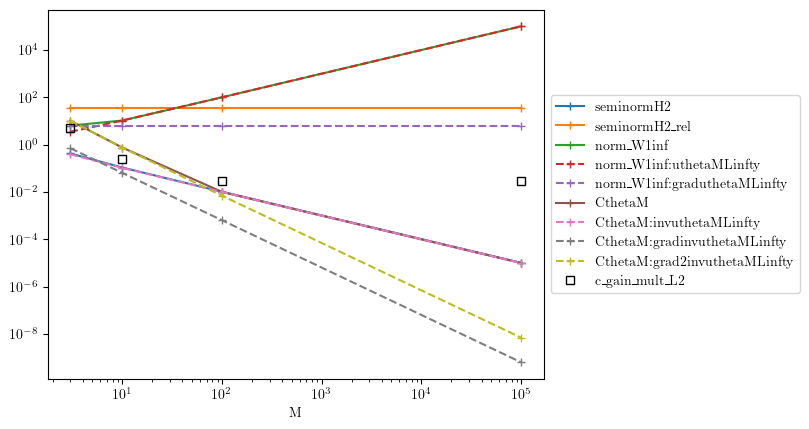

In [86]:
# Plot
plt.figure()
for key in dict_cste.keys():
    if isinstance(dict_cste[key],list):
        plt.loglog(tab_M,dict_cste[key],"+-",label=key)
    else:
        for subkey in dict_cste[key].keys():
            if subkey == "total":
                linetype = "+-"
                plt.loglog(tab_M,dict_cste[key][subkey],linetype,label=key)
            else:
                linetype = "+--"
                plt.loglog(tab_M,dict_cste[key][subkey],linetype,label=key + ":" + subkey)
# plt.loglog(tab_M,tab_c_gain_mult_H1,"o",color="black",label="c_gain_mult_H1",markersize=4)
if deg_m==0:
    plt.loglog(tab_M,tab_c_gain_mult_L2,"s",color="black",label="c_gain_mult_L2",markerfacecolor='none')
plt.xlabel("M")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

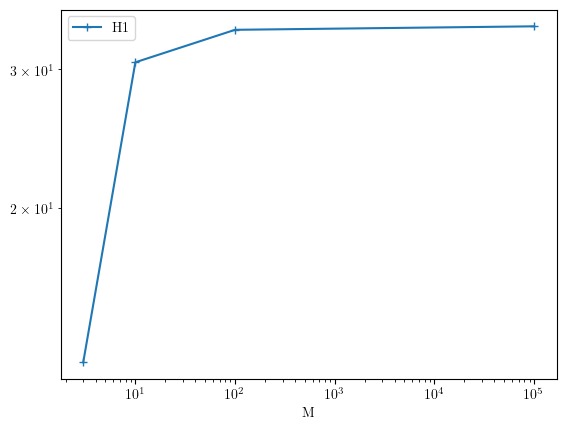

In [ ]:
# Plot
plt.figure()
plt.loglog(tab_M,1/tab_c_gain_mult_H1,"+-",label="H1")
plt.xlabel("M")
plt.legend()
plt.show()

In [ ]:
# import csv
# deg_m = 1
# # Le nom du fichier de sortie
# fichier_csv = f"output_deg{deg_m}.csv"

# # Sauvegarde des données au format CSV
# with open(fichier_csv, mode='w', newline='') as file:
#     writer = csv.writer(file,delimiter=' ')
#     # Écrire l'en-tête (optionnel)
#     writer.writerow(["M", "Cgainmult"])
#     # Écrire les données ligne par ligne
#     if deg_m==0:
#         tab = tab_c_gain_mult_L2
#     else:
#         tab = tab_c_gain_mult_H1
#     for m, val in zip(tab_M, tab):
#         writer.writerow([m, val])

# print(f"Les données ont été sauvegardées dans le fichier {fichier_csv}")

### Add vs Mult

$$C_{\text{\rm gain},H^1}^{\times,M}\underset{M\rightarrow\infty}{\longrightarrow}C^{+}_{\text{\rm gain}},$$
$$C_{\text{\rm gain},L^2}^{\times,M}\underset{M\rightarrow\infty}{\longrightarrow}C^{+}_{\text{\rm gain}}.$$

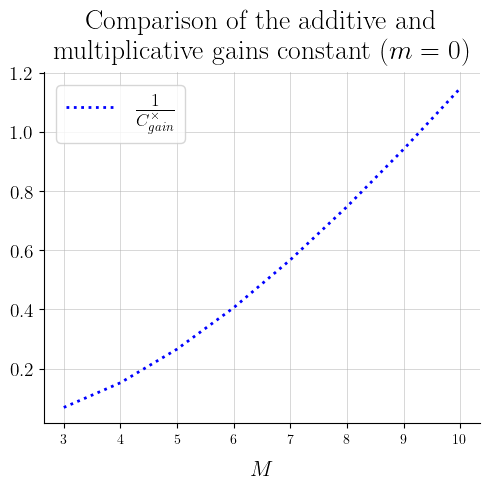

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

# Configuration des polices LaTeX
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Taille des textes pour les titres, axes, etc.
title_size = 20
legend_size = 16

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(5, 5))

# Tracés des courbes
# ax.axhline(y=1.0/c_gain_add, color="orange", linestyle='--', linewidth=2, label=r"$\frac{1}{C_{gain}^+}$")
if deg_m == 1:
    ax.plot(tab_M, 1.0/tab_c_gain_mult_H1, linestyle='dotted', linewidth=2, color="blue", label=r"$\frac{1}{C_{gain}^\times}$")
elif deg_m == 0:
    ax.plot(tab_M, 1.0/tab_c_gain_mult_L2, linestyle='dotted', linewidth=2, color="blue", label=r"$\frac{1}{C_{gain}^\times}$")


# Configurer les axes
ax.set_xlabel(r"$M$", fontsize=legend_size, labelpad=10)

# Configurer les ticks principaux (uniquement) pour l'axe x
# ax.set_xticks(tab_M)
# ax.set_xticklabels(labels=tab_M, fontsize=legend_size-2)
ax.tick_params(axis='x', which='minor', bottom=False, labelsize=legend_size-2)

# Configurer les ticks principaux (uniquement) pour l'axe y
ax.tick_params(axis='y', labelsize=legend_size - 2)

# Ajouter une grille légère
ax.grid(visible=True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
ax.grid(visible=True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

# Supprimer les bordures supérieures et droites
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajuster la légende
ax.legend(fontsize=legend_size+2)

# Ajustement des marges
plt.tight_layout()
plt.title(f"Comparison of the additive and\nmultiplicative gains constant ($m={deg_m}$)", fontsize=title_size,pad = 10) 

# Afficher
version_str = f"version{version}"
results_dir = repo_dir + f"/results/fenics/test_1D/testcase{testcase}/{version_str}/cvg/param{param_num}/"

fig.tight_layout()
plt.gca().set_rasterization_zorder(-1)
plt.savefig(results_dir+f"comp_mult_add_gain_m{deg_m}.pdf",bbox_inches='tight',format="pdf")
plt.show()


## Derivatives

In [ ]:
import numpy as np
from scimba.equations.domain import SpaceTensor
from testcases.utils import select_param

N=1000

param_num = config["error_estimations"]["param_num"]    
params = [select_param(problem,param_num)]

XXYY = np.linspace(0, 1, N)
print(XXYY.shape)
XXYY = XXYY.reshape(-1,1)

X_test = torch.tensor(XXYY,requires_grad=True)
X_test = SpaceTensor(X_test,torch.zeros_like(X_test,dtype=int))

# get parameters
nb_params = len(trainer.pde.parameter_domain)
shape = (XXYY.shape[0],nb_params)
ones = torch.ones(shape)
mu_test = (torch.Tensor(params[0]).to(device) * ones).to(device)

u_ex = pde.reference_solution(X_test, mu_test).cpu().detach().numpy()[:,0]
du_ex_dx = pde.reference_solution_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]
d2u_ex_dx2 = pde.reference_solution_second_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]

pred = u_theta.setup_w_dict(X_test, mu_test)
u_theta.get_first_derivatives(pred, X_test)
u_theta.get_second_derivatives(pred, X_test)
        
u_theta_ = pred["w"][:,0].cpu().detach().numpy()
u_theta_x = pred["w_x"][:,0].cpu().detach().numpy()
u_theta_xx = pred["w_xx"][:,0].cpu().detach().numpy()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Définir les tailles pour les titres et les légendes
title_size = 24  # Taille des titres
legend_size = 20  # Taille des légendes

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# plot u
axs[0].plot(XXYY, u_theta_, label=r"$u_\theta$")
axs[0].plot(XXYY, u_ex, label=r"$u$")
axs[0].set_title("Solution", fontsize=title_size)
axs[0].legend(fontsize=legend_size)

# plot du/dx
axs[1].plot(XXYY, u_theta_x, label=r"$d_xu_\theta$")
axs[1].plot(XXYY, du_ex_dx, label=r"$d_xu$")
axs[1].set_title("First-order derivative", fontsize=title_size)
axs[1].legend(loc="upper center", fontsize=legend_size)

# plot d2u/dx2
axs[2].plot(XXYY, u_theta_xx, label=r"$d_{xx}u_\theta$")
axs[2].plot(XXYY, d2u_ex_dx2, label=r"$d_{xx}u$")
axs[2].set_title("Second-order derivative", fontsize=title_size)
axs[2].legend(fontsize=legend_size)

# plot error
axs[3].plot(XXYY, abs(u_ex-u_theta_), label=r"$|u-u_\theta|$")
axs[3].plot(XXYY, abs(du_ex_dx-u_theta_x), label=r"$|d_xu-d_xu_\theta|$")
axs[3].plot(XXYY, abs(d2u_ex_dx2-u_theta_xx), label=r"$|d_{xx}u-d_{xx}u_\theta|$")
axs[3].set_title("Errors", fontsize=title_size)
axs[3].legend(fontsize=legend_size)

# Ajouter une grille
for ax in axs:
    ax.grid()

# Affichage de la figure
if version == 1:
    name = "PINN"
else:
    name = "data" 
version_str = f"version{version}"
results_dir = repo_dir + f"/results/fenics/test_1D/testcase{testcase}/{version_str}/cvg/param{param_num}/"
    
fig.tight_layout()
plt.gca().set_rasterization_zorder(-1)
plt.savefig(results_dir+f"{name}.pdf",bbox_inches='tight',format="pdf")

## Gains

### Imports

In [ ]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [ ]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir, tab_degree=[1])
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

### Run FEM

In [ ]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

In [ ]:
# gains_enhanced_fem.run_fem_alldeg(new_run=False)

### Run PINNs

In [ ]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

In [ ]:
# gains_enhanced_fem.run_pinns_alldeg(new_run=False)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

In [ ]:
# gains_enhanced_fem.run_corr_alldeg(new_run=False)

### Run Mult

In [ ]:
tab_M = [0.0]

In [ ]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

In [ ]:
# gains_enhanced_fem.run_mult_alldeg_allM(tab_M,new_run=False)

### Compare methods

In [ ]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree,tab_M)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree,tab_M)

In [ ]:
# compare_gains_methods.create_dataframes_alldeg_allM(tab_M)

In [ ]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree,tab_M)